In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
    df_companies = pd.read_csv('moved_project_sql_result_01.csv')
    
    df_neighborhoods = pd.read_csv('moved_project_sql_result_04.csv')
    
    df_hypothesis = pd.read_csv('moved_project_sql_result_07.csv')
    
    print("✅ data succesfully loaded")
    

✅ data succesfully loaded


In [3]:
df_companies.info()
df_companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
df_neighborhoods.info()
df_neighborhoods.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
df_hypothesis.info()
df_hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


🏆 TOP 10 NEIGHBORHOODS BY NUMBER OF TRIP DROPOFFS
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


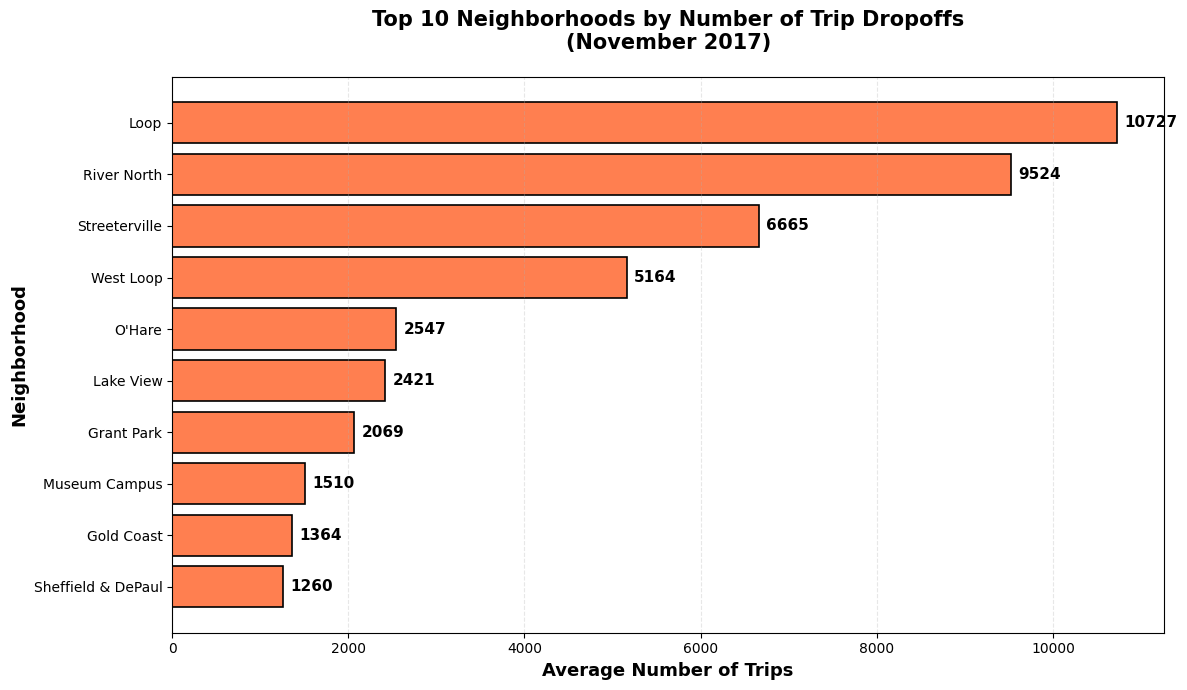

In [6]:
# Sort neighborhoods by average number of trips and get the top 10
top_10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips')

print("🏆 TOP 10 NEIGHBORHOODS BY NUMBER OF TRIP DROPOFFS")
print(top_10_neighborhoods)

# Sort values to display them properly in a horizontal bar chart
top_10_neighborhoods = top_10_neighborhoods.sort_values('average_trips', ascending=True)

# Top 10 neighborhoods by number of trip dropoffs
top_10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips').sort_values('average_trips', ascending=True)

# Top 10 neighborhoods by number of trip dropoffs
top_10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips').sort_values('average_trips', ascending=True)

# Create the chart
plt.figure(figsize=(12, 7))
bars = plt.barh(
    top_10_neighborhoods['dropoff_location_name'],
    top_10_neighborhoods['average_trips'],
    color='coral',
    edgecolor='black',
    linewidth=1.2
)

plt.xlabel('Average Number of Trips', fontsize=13, fontweight='bold')
plt.ylabel('Neighborhood', fontsize=13, fontweight='bold')
plt.title(
    'Top 10 Neighborhoods by Number of Trip Dropoffs\n(November 2017)',
    fontsize=15,
    fontweight='bold',
    pad=20
)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add values to the bars
plt.bar_label(bars, fmt='%.0f', padding=5, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


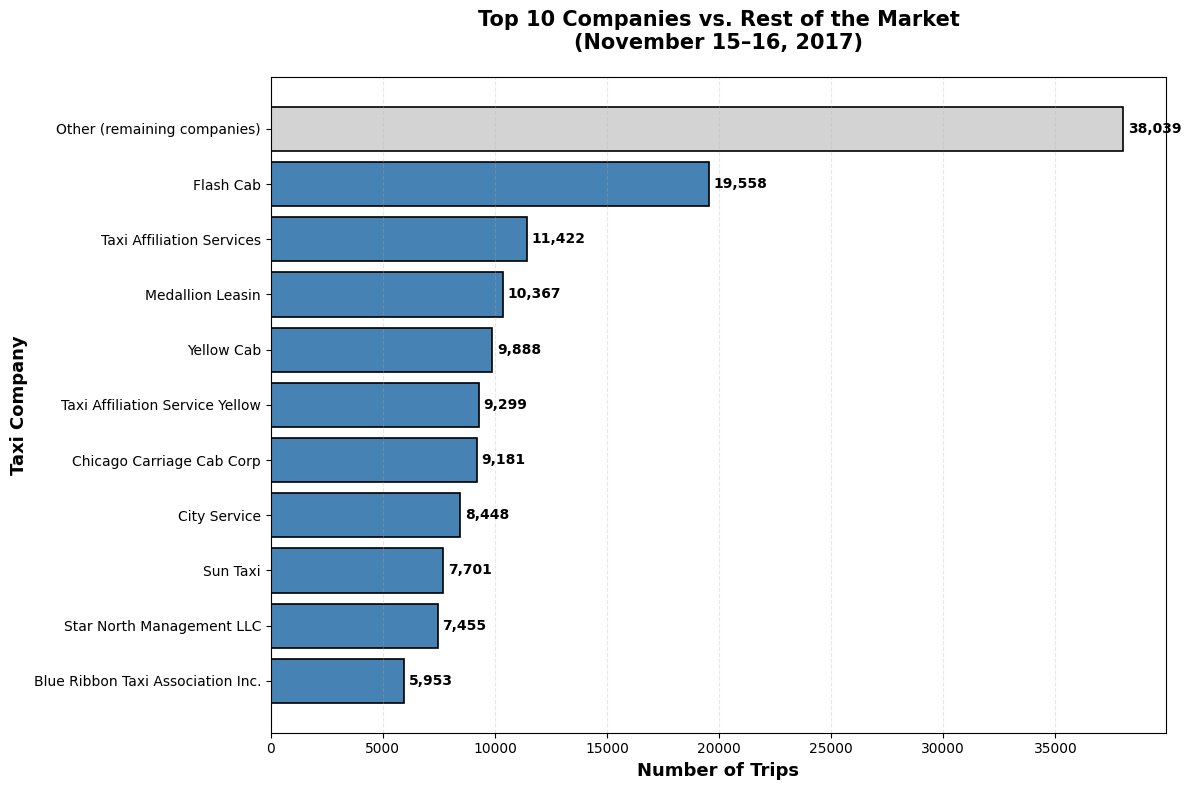


📝 CONCLUSION - Chart including 'Other':

- Top 10 companies: 99,272 trips
- Remaining companies: 38,039 trips
- Top 10 companies represent 72.3% of the market
- The market is highly concentrated among a small number of large companies



In [7]:
# ===== TOP 10 COMPANIES + "OTHER" (remaining companies) =====

# Split top 10 companies and the rest
top_10_companies = df_companies.nlargest(10, 'trips_amount')
rest_companies = df_companies.nsmallest(len(df_companies) - 10, 'trips_amount')

# Create a row for "Other" (sum of the remaining companies)
other_row = pd.DataFrame({
    'company_name': ['Other (remaining companies)'],
    'trips_amount': [rest_companies['trips_amount'].sum()]
})

# Combine datasets
df_plot = pd.concat([top_10_companies, other_row], ignore_index=True)
df_plot = df_plot.sort_values('trips_amount', ascending=True)

# Create the chart
plt.figure(figsize=(12, 8))

# Colors: blue for top 10, gray for "Other"
colors = ['steelblue'] * 10 + ['lightgray']

plt.barh(
    df_plot['company_name'],
    df_plot['trips_amount'],
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

plt.xlabel('Number of Trips', fontsize=13, fontweight='bold')
plt.ylabel('Taxi Company', fontsize=13, fontweight='bold')
plt.title(
    'Top 10 Companies vs. Rest of the Market\n(November 15–16, 2017)',
    fontsize=15,
    fontweight='bold',
    pad=20
)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (company, trips) in enumerate(
    zip(df_plot['company_name'], df_plot['trips_amount'])
):
    plt.text(
        trips + 200,
        i,
        f'{int(trips):,}',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# 📝 CONCLUSION
print("\n📝 CONCLUSION - Chart including 'Other':")
print(f"""
- Top 10 companies: {top_10_companies['trips_amount'].sum():,} trips
- Remaining companies: {rest_companies['trips_amount'].sum():,} trips
- Top 10 companies represent {(top_10_companies['trips_amount'].sum() / df_companies['trips_amount'].sum() * 100):.1f}% of the market
- The market is highly concentrated among a small number of large companies
""")


C:\Users\Camilo Mantilla\AppData\Local\Temp\ipykernel_10732\1133996107.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


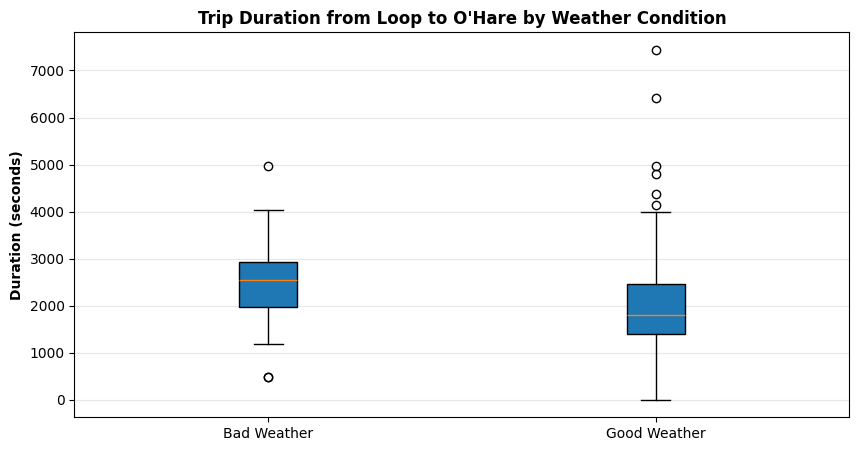

Mean Duration (Bad Weather): 2427.21 sec | Mean Duration (Good Weather): 1999.68 sec
P-value: 0.000000 | Alpha: 0.05

✅ Reject H₀: Weather DOES affect trip duration


In [8]:
# Hypothesis Testing: Impact of Weather on Trip Duration

# Split groups
group_bad = df_hypothesis[df_hypothesis['weather_conditions'] == 'Bad']['duration_seconds']
group_good = df_hypothesis[df_hypothesis['weather_conditions'] == 'Good']['duration_seconds']

# Visualization
plt.figure(figsize=(10, 5))
plt.boxplot(
    [group_bad, group_good],
    labels=['Bad Weather', 'Good Weather'],
    patch_artist=True
)
plt.ylabel('Duration (seconds)', fontweight='bold')
plt.title(
    'Trip Duration from Loop to O\'Hare by Weather Condition',
    fontweight='bold'
)
plt.grid(axis='y', alpha=0.3)
plt.show()

# T-test
alpha = 0.05
t_statistic, p_value = stats.ttest_ind(group_bad, group_good)

# Results
print(
    f"Mean Duration (Bad Weather): {group_bad.mean():.2f} sec | "
    f"Mean Duration (Good Weather): {group_good.mean():.2f} sec"
)
print(f"P-value: {p_value:.6f} | Alpha: {alpha}")
print(
    f"\n{'✅ Reject H₀: Weather DOES affect trip duration' if p_value < alpha else '❌ Fail to reject H₀: Weather does NOT affect trip duration'}"
)


## ✅ Conclusions

### Test Results
- **P-value:** 0.000000 (highly significant)
- **Decision:** We reject H₀ with **99.9999% confidence**

### Key Findings
1. **Significant weather impact:** Trips on rainy Saturdays last **7.1 minutes longer on average** (an additional 427 seconds)
2. **21% increase:** Bad weather increases trip duration by more than one fifth
3. **Higher variability:** Trips during bad weather show greater dispersion, indicating higher unpredictability

### Recommendations for Zuber
- **Adjust ETA estimates:** Add 7–10 extra minutes on rainy days
- **Dynamic pricing:** Consider weather-based fare adjustments on this route
- **Driver allocation:** Increase driver availability on Saturdays with rain forecasts
- **User communication:** Inform users about expected delays due to weather conditions
